# Week X - Basics of Machine Learning - Part 1

<hr style="border:2px solid gray">

# Index: <a name="index"></a>
0. [Preliminaries: Recommended books](#preliminaries)
1. [Gradient Descent](#gradient)
1. [Types of Machine Learning](#types_of_ML)
1. [Challenges in Machine Learning](#challenges)
1. [Simple Regression Algorithms](#regression)
    1. [k-Nearest Neighbours](#knn)
    1. [Linear Regression](#linear)
    1. [Polynomial Regression](#polynomial)
1. [Bias-Variance Tradeoff](#bias-var)
1. [Investigating Over- and Underfitting](#over_under)
1. [Appendix](#appendix)
    1. [Mathematical Equation Recap](#maths_recap)
    1. [Gradient Descent](#gradient)
    1. [Types of Gradient Descent](#types_grad)



<hr style="border:2px solid gray">

# Preliminaries: Recommended Books [^](#index) <a name="preliminaries"></a>

There are three books that I would recommend:

1) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- This is the best hands-on book that I have read and has sufficient detail to take you into the understanding of the algorithms. Many of the original papers are cited, and links to them can be found on their website. There is also more information on the [github](https://homl.info). If you only buy one book, then this one covers the most. **If there was a textbook for this course, this would be it.**
- This is referenced as {HoML}

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)
- This is more introductory than the previous book, however it is very well written and takes you through things more carefully.
- This is referenced as {IMLP}.

2) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by Andriy Burkov
- This is the best conceptual book on machine learning (ML) that I have read, and it also does a reasonable jobs of the maths. This book is free to try before you buy.

There are plenty of other more theoretical ML books availiable, but the above are practical whilst still containing enough theory to understand the concepts. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

### Common Terms in Machine Learning

A machine learning (ML) algorithm is trained to make a prediction based on an input. This is achieved by learning from a **training dataset**. 

-  The **label** is the variable we will be trying to predict, and is given the notation **y**. This could be a continuous value such as a price of a house, or a discrete/categorical value such as whether the house should be purchased. 


- When our data has this variable, the data is described as **labelled** and can be used for training.  Once training is complete, an ML model will make predictions from **unlabelled** data. 

    - Unlabelled data can sometimes be used for training with particular algorithms (see below).
    - The predictions made by the model are given the symbol **y'**.


- **Features** are input variables that describe the data ($x_{1}$ ... $x_{n}$). A feature is a single coulmn in our data table. This could be continuous variables such as previous house price, age of house etc, or discrete values such as number of bathrooms. 


- An **example** or **instance** is one data point (or a single row in our data table), for example the data for one particular house


- When a ML algorithm is trained, it is attempting to find the model **parameters** that define the specific form the prediction model will take. The group of parameters associated with a model undergoing training is often descibed with the symbol $\boldsymbol{\theta}$. For a polynomial model, this could be the coeffients of the polynomial terms. Alternatively, these could be the weights in a neural network.


- **Hyperparameters** are varaiables which dictate how an ML algorithm learns. Finding the best hyperparameters will normally require a grid search (more later). Examples of hyperparameters include the degree of the polynomial you are trying to fit, as well as more complex ML ideas such as learning rate.

    - Some variables can act as hyperparameters or parameters depending on the circumstance, such as the number of data categories. 
    - In general, if you specify a variable's value then it is acting as a hyperparameter. If the model is trained to find the variable's value it is a parameter.





<hr style="border:2px solid gray">

# Types of Machine Learning [^](#index) <a name="types_of_ML"></a>

### Supervised, Unsupervised and Reinforcement Learning

- **Supervised learning** builds a model using labelled data. Most of the machine learning used is supervised, as are most models we cover in this course. 
    - _Examples: sorting emails to know which ones are spam (classification), autocorrect, predictive analytics, object detection (such as facial recognition), predicting the price of a car (regression) etc._ 


- **Unsupervised learning** is performed when the training data is **unlabelled**. Instead the model must be built based on other properties.
    - _Examples: **clustering** the data into unknown categories, gaining intuition of high-dimensional data, social network friend suggestions etc._
    

- **Semi-supervised learning** or **weak learning** is a type of ML somewhere between the first two types, where the algorithm must cope with partially labelled data.

Below is a picture from Wikipedia's Machine Learning series, which shows what scenarios are trained which which type of model. Some ML cross circle boundaries, highlighting how the traditional boundaries of these models are being blurred with today's algorithms.

<img src="data_2_DC/imgs_basic/types_of_ML.png" alt="Examples of uses of different types of ML" width="600"/>

**Reinforcement learning** is somewhat different to the types described above. A reinforcement learning algorithm uses **agents** that perform a (sometimes complex) series of tasks. These agents learn to perform the tasks well through a series of trial and error. If you have ever played a game against a 'computer' then this is almost certainly how it was trained. 

### Classification and Regression

There are two main types of ML used in the physical sciences. Although these types are conceptually different, the same ML approaches can often be applied to both.

- In a **classification** problem, we are trying to sort our data into distinct categories. 
    - For example, the model could differentiate pictures of cats from dogs, flower types or clothing types. Below shows a diagram with a spam classificaton example, where known emails and classifications are used to classify new emails.

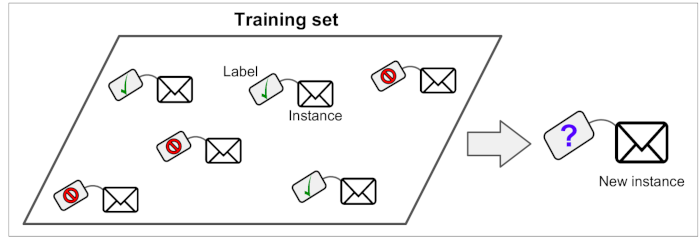



- In a **regression** problem, we are trying to predict a numerical value. 
    - For example the return on an investment, a house's value etc. A regression example (where the input data has a single feature) is shown below.

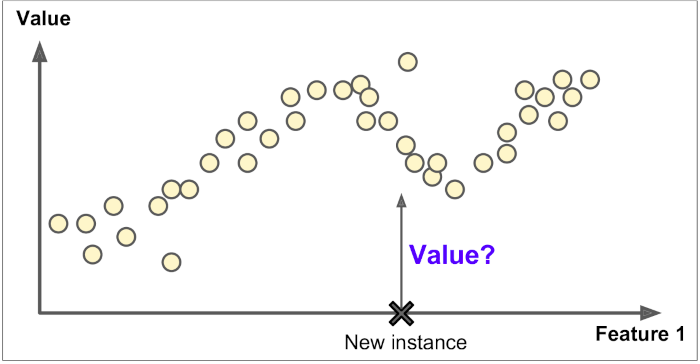


### Instance-Based and Model-Based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data, and there are two main approaches to achieve this:

- **Instance-Based Learning**: the algorithm simply compares a new (unlabelled) data instance to the training data. The prediction for the new instance is based on how 'similar' it is to the training data. A common similarity measure is the euclidian distance between points. Instance-based learning can also be called memory-based or lazy learning, since processing only occurs when a new prediction must be made.

    - Instance-based learning algorithms that we will cover are **k-nearest neighbours** and **support vector machine**
    

- **Model-Based Learning**: the algorithm tries to generalise any underlying patterns in the training data. These trends are then used to construct a more general model, that is further refined through testing and validation. Predictions for new data are made by following these patterns
    - Most algorithms we consider in this course fall under this category.

<hr style="border:2px solid gray">

# Challenges in Machine Learning [^](#index) <a name="challenges"></a>

- ### Insuficient Training Data <br>

    - **Training data** is the dataset from which our ML model learns. Often thousands of instances are required to build a reasonable model. There are various methods to lower the amount of required data, but not enough data will result in a poor ML model.

- ### Unrepresentative (Biased) Training Data <br>

    - A **systematic bias** can arise in your training data due to how the data was collected. This may result in your trained model not generalising well and producing incorrect predictions. Hence sampling bias can be very dangerous for your ML model. Some form of **regularisation** can be used to mitigate this to some extent (see below in section three).
    - Examples of systematic bias include background noise, zero error etc.

- ### Poor Quality Data <br>

    - If your data is **noisy** (it contains many errors and outliers), then your model is likely to be unreliable. <br>
    - The dataset may also contain missing fields (e.g. an instrument was not working that day), at which point you need to decide how to manage the data point. 
    - There are many approaches with their own pros and cons, but two common examples are: <br>

        - Set the missing fields to take the **median value** of the feature, so that the value has very little influence on the model
        - Set the missing fields to take a value **far outside the normal range**, so that the model learns to ignore that data point

- ### Irrelevant Features <br>

    - Irrelevant data can sometimes swamp the model, meaning that the most relevant information fields are ignored. 
    - An important part of ML is **feature engineering**, where you create a dataset with an appropriate set of features. This can involve selecting only the most important data features or combining features into new, more appropriate features. 
    - For example, if a feature is only a function of $r$, where $r=\sqrt{x^2+y^2}$, it is better to use $r$ than $x$ and $y$ separately.

- ### Overfitting the Training Data <br>

    - An overfit model has is one that has modelled the training data **too well**, for examply by learning and fitting to the noise and outliers present in the training data. An overfit model would then not be able to make accurate predictions for unseen data. We say that an overfit model is **too complex**. To prevent this, you should try to keep your model as simple as possible, as well as perform cross-validation checks (more later).

Below is an example of an ML model overfitting to the training data. In this case, we chose the model to be a high-degree polynomial rather than a simpler function. (Source: {HoML} 1-22).

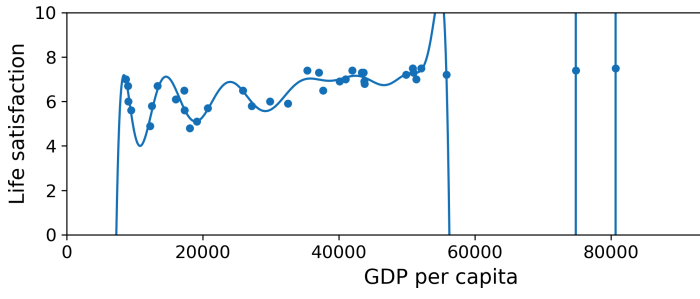


- ### Underfitting <br>

    - The opposite of overfitting - when your model is too simple to fit the training data and thus misses the underlying structure e.g. trying to fit parabolic data with a linear model. This model is **too simple**.

### Resolution: Testing and Validating

The only way to know if a model has generalised well is to **validate it on data**. The normal way to do this is to separate the data into **training data** and **testing data**. The training data is used to train the model, whereas the testing data tests how well the model has generalised. 

If there is a large difference in model performance on the training data compared to on the testing data, the model has been overtrained. 

*What fraction of data should be used for training rather than testing?* There is no single answer to this question, but in most cases the training : testing ratio should typically be around 70 : 30 or 80 : 20.

<hr style="border:2px solid gray">

# Simple Regression Algorithms [^](#index) <a name="regression"></a>

In a regression problem, the model is trying to predict a **value** of some quantity. 

This is different from the fitting that your were performing with iminuit last week. There, you had an implicit assumption that there is an underlying truth that the data would follow in the absence of noise and statistical effects, here all that is assumed is that these data vary in a similar way.

Let's set up a dataset:

/Users/frejaschaap/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


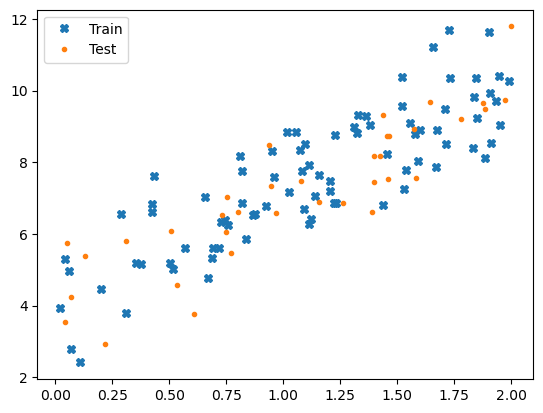

In [4]:
#Importing relevant packages and functions
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split
import pylab as pl
from IPython.display import Latex

x = 2*np.random.rand(120, 1) 
# np.random.rand: prodcues array of numbers from a uniform distribution

y = 4 + 3*x + np.random.randn(120, 1) 
# np.random.randn: prodcues array of numbers from a normal distribution. 
# Here we are adding normally distributed noise.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
#sklearn can split your data into samples for you, here we have done a 70:30 split of training:testing.

#Plotting our data
pl.plot(x_train,y_train,"X", label='Train')
pl.plot(x_test,y_test,".", label='Test')
pl.legend()
pl.show()

We have plotted $y=(3x+4)+\epsilon$, where $\epsilon$ is a random number on the interval $[0,1)$. We have essentially added noise to what would otherwise be a perfect straight line.

<hr style="border:2px solid gray">

# A. k-Nearest Neighbours [^](#index) <a name="knn"></a>

k-Nearest Neighbours (kNN) is a very useful algorithm if you are not making assumptions about the linearity or underlying shape of the data.

<div style="background-color: #FFF8C6">

### k-Nearest Neighbours (k-NN) Detailed Description

The k-NN algorithm can be used for both classification and regression.
    
- The algorithm starts by calculating the 'distance' from a new point $x$ to every point in the training dataset. A commonly used distance is the Euclidian distance, although there are other options depending on the probem at hand (see [IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point) for examples). The algorithm then finds the $k$ nearest points closest to $x$.
    
    
- In a **regression** problem, the predicted label/output of data point $x$ is calculated as the, sometimes weighted, mean of the labels of its k-nearest neighbours.
    
    
- In a **classification** problem, we assign the new data point $x$ to the most popular (after weighting) class of its $k$-nearest neighbours. The image below shows an example of this. When $k=3$ the green object is classified as a triangle (see the inner circle) whereas when $k=5$ the object is classified as a square (outer circle). _Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)_

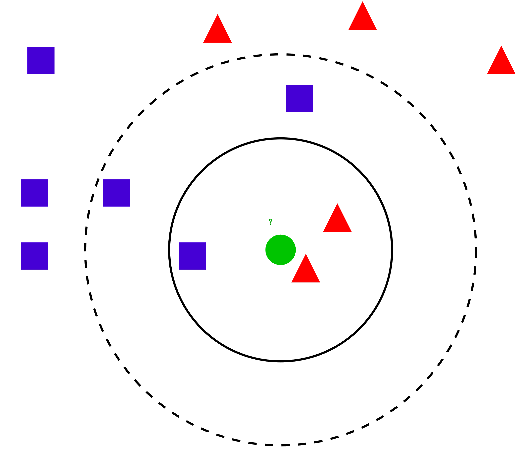


<div style="background-color: #FFF8C6">

In the code below, we will call a 'fit' function on our training data. kNN is an instance-based algorithm, rather than model-based, so no calculations are involved in this step; the algorithm is simply committing the data set to memory. For more longer and complex datasets, we may choose to describe the parameter 'algorithm' - this would cause the data to be stored in a form more efficient for prediction (see [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html))

The mean squared error is 1.0


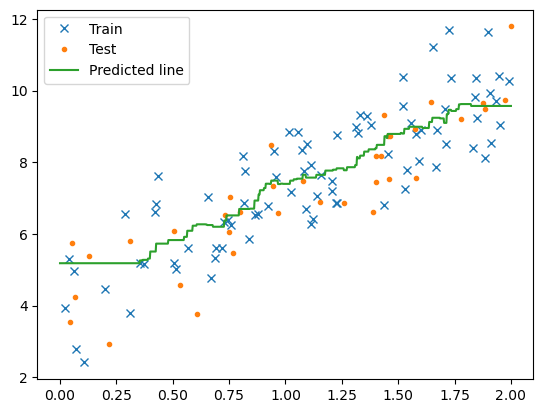

In [5]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

k = 18 # number of NN taken into account.

weights = "uniform" 

# Uniform weights. All points in each neighborhood are weighted equally.

#weights = "distance" 

# Weight points by the inverse of their distance. 
# Closer neighbors of a query point will have a greater influence than neighbors which are further away.
# Try experimenting with weights to see how it effects the model

model = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
model.fit(x_train, y_train)

# Plotting the predicted line from the training data

xl = np.linspace(0, 2, 1000).reshape(-1, 1)

pl.plot(x_train, y_train, "x", label='Train')
pl.plot(x_test, y_test, ".", label='Test')

pl.plot(xl, model.predict(xl), label='Predicted line')
# As discussed previously, it is here where the actual prediction takes place

pl.legend()

#Calculate the root mean squared (RMS) error for testing data

pred = model.predict(x_test) #Make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #calculate RMSE

print("The mean squared error is", round(error, 2))
pl.show()


To evaluate the effectiveness of our model, we will use **cross-validation**.

<div style="background-color: #FFF8C6">

### k-Fold Cross-Validation    

The aim of cross-validation (CV) is to reduce the risk of overfitting.
    
In k-fold cross-validation, the data is split into $k$ seperate data sets (or 'folds') rather than a test and training set. These sets are distinct and do not overlap (a data instance will only belong to a single set).
    
One of these sets is chosen to be the test set, whilst the other $k-1$ sets act as the training dataset. The model is trained on the training data, and its performance evaluated on the test set (for example, using MSE).
    
This process occurs $k$ times, so that every set acts as a test dataset once.
    
The overall performance is calculated as the average value found over all run-throughs.
    
**Choosing $k$, the number of sets**
    
The most appropriate value of $k$ to use depends on your sample, and may require experimentation to find. It is quite common to choose k=5 or k=10, values which balance relatively low computational cost and relatively reliable performance estimates.
    
Another option is to set k = n, where n is the number of instances in your dataset. This is called **leave-one-out cross-validation**. This maximum value of k requires maximum computational power (so avoid for large datasets), but the trained model will train from the largest training dataset.
    
The comparison of variance and bias for different values of k is a controverstial subject of discussion. [Stack Exchange](https://stats.stackexchange.com/questions/90902/why-is-leave-one-out-cross-validation-loocv-variance-about-the-mean-estimate-f) provides a discussion on the various schools of thought.

_Refererences: [Machine Learning Mastery](https://machinelearningmastery.com/k-fold-cross-validation/)_

In [6]:
from sklearn.model_selection import cross_val_score

n = len(xl)

cross_val_arr = cross_val_score(model, x_train, y_train, cv=3) 

print (cross_val_arr)
print (np.average(cross_val_arr))                             

[0.55082629 0.67247409 0.6564342 ]
0.6265781933045081


<div style="background-color: #C2F5DD">

### Exercise

- Investigate how well kNN performs as a function of number of nearest neighbours and type of weighting. Try changing the number of points may be from 120 to 1200 and see how things change.
    
- Investigate how the value of $k$ in the k-fold CV changes the estimation of performance.

<hr style="border:2px solid gray">

# B. Linear Regression [^](#index) <a name="linear"></a>

It is possible to **analytically** calculate the equation of the line that has minimised the MSE (this is the line found through the least squares method). A proof of this can be found in {HoML}.

However, as the number of data instances becomes very large, this approaches becomes computationally intensive. Instead, we can find the equation of this line using gradient descent (which will be performed when `fit` is called).

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # Linear regression fit on the training data

m = lin_reg.coef_[0,0] # The gradient of the straight-line
c = lin_reg.intercept_[0] # The straight line y-intercept

print("The line of best fit is y = {m} x + {c}".format(c=round(c, 2), m=round(m, 2)))

The line of best fit is y = 2.99 x + 4.22


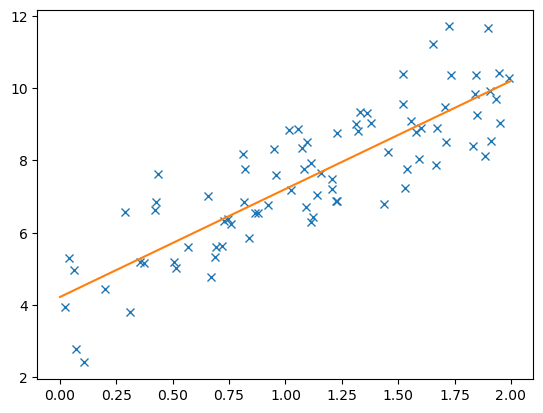

The RMSE is 0.93


In [8]:
pl.plot(x_train, y_train, "x")
pl.plot(xl, lin_reg.predict(xl))

pred = lin_reg.predict(x_test) # Make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #Calculate RMSE of the linear regression

pl.show()
print("The RMSE is {error}".format(error=round(error,2)))


<hr style="border:2px solid gray">

# Polynomial Regression  [^](#index) <a name="polynomial"></a>

The main concept in polynomial regression is to use a linear model to fit non-linear data. A simple way to do this is to create new features, which arepowers of previous features. We then train a linear model on this extended set of features. Polynomial regression, unlike a linear regression model, is capable of finding relationships between features due to the inclusion of interaction features (more below).

_This example is adapted from {HoML} pg. 130-135_

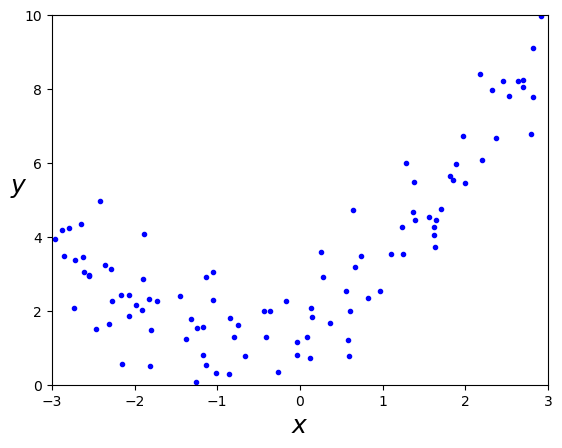

In [9]:
#generate some non-linear data based on a simple quadratic equation
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Adding some noise

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

### Brief Introduction to sklearn Preprocessing

We will now use `sklearn.preprocessing` to add additional features to our dataset. 

`PolynomialFeatures` module from this sklearn module takes an input matrix, and create new columns (or new features) with all the possible polynomial feature combinations up to a specified degree. If required, we could also set a minimum specified degree. In the cells below, we will demonstrate some of these features. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for documentation.

- The default for <span style="color:blue">include_bias</span> is <span style="color:blue">True</span>. If set to <span style="color:blue">False</span>, a feature column won't be created for $0^{th}$ degree polynomials.

- The default for <span style="color:blue">interaction_only</span> is <span style="color:blue">False</span>. If set to <span style="color:blue">True</span>, the only polynomial features to be created will be *combinations* of the input features. 



`StandardScaler` module will standardise the features in the dataset: each feature will be centred (the mean will be removed from each instance of that feature) and then the data scaled to that the new variance equals 1. This is important as many ML models required centred data that have similar orders of magnitude.

`sklearn.pipeline` can sequentially combine a list of these transformations with a final estimator to assemble a single model, which can then be cross-validated. These transformations/estimators are added to the Pipeline format as a tuple: ('transform name', transform).

See [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for documentation.

There are far more prepocessing examples we could use to create features, a list of which is found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), including binning continuous data into intervals, binarizing data or adding a dummy feature.


In [19]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

data = np.arange(6).reshape(3, 2)

Headers0=['a', 'b']
df0=pd.DataFrame(data=data, columns=Headers0)

poly1 = PolynomialFeatures(2)
Headers1 = ['1', 'a', 'b', 'a^2', 'a * b', 'b^2']
df1 = pd.DataFrame(data=poly1.fit_transform(data), columns=Headers1)

poly2 = PolynomialFeatures(2, include_bias = False)
df2 = pd.DataFrame(data=poly2.fit_transform(data), columns=Headers1[1:])

poly3 = PolynomialFeatures(2, interaction_only = True)
Headers3 = ['1', 'a', 'b', 'a * b']
df3 = pd.DataFrame(data=poly3.fit_transform(data), columns=Headers3)

display(df0)
display(df1)
display(df2)
display(df3)

,a,b
0,0,1
1,2,3
2,4,5


,1,a,b,a^2,a * b,b^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0


,a,b,a^2,a * b,b^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0


,1,a,b,a * b
0,1.0,0.0,1.0,0.0
1,1.0,2.0,3.0,6.0
2,1.0,4.0,5.0,20.0


In this case, we will add a feature for the squares of the numbers. We can then perform linear regression on this expanded dataset:

In [11]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X) #One feature and square of feature

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

a = lin_reg.coef_[0,1]
b = lin_reg.coef_[0,0]
c = lin_reg.intercept_[0]

Latex("The predicted output function is $f(x)={a}x^2+{b}x+{c}$ whereas\
        the underlying output function is $y=0.5x^2+1.0x+2+\epsilon$ where $\epsilon$\
        is Guassian noise.".format(a=round(a,2),b=round(b,2),c=round(c,2)))

<IPython.core.display.Latex object>

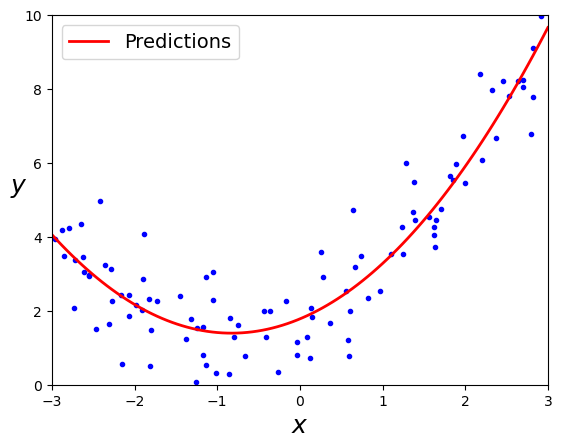

In [13]:
X_linspace = np.linspace(-3, 3, 100).reshape(100, 1)
X_linspace_poly = poly_features.transform(X_linspace)
y_linspace = lin_reg.predict(X_linspace_poly)

plt.plot(X, y, "b.")
plt.plot(X_linspace, y_linspace, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

Now we can experiment with adding more polynomial features to fit this data (20 features):

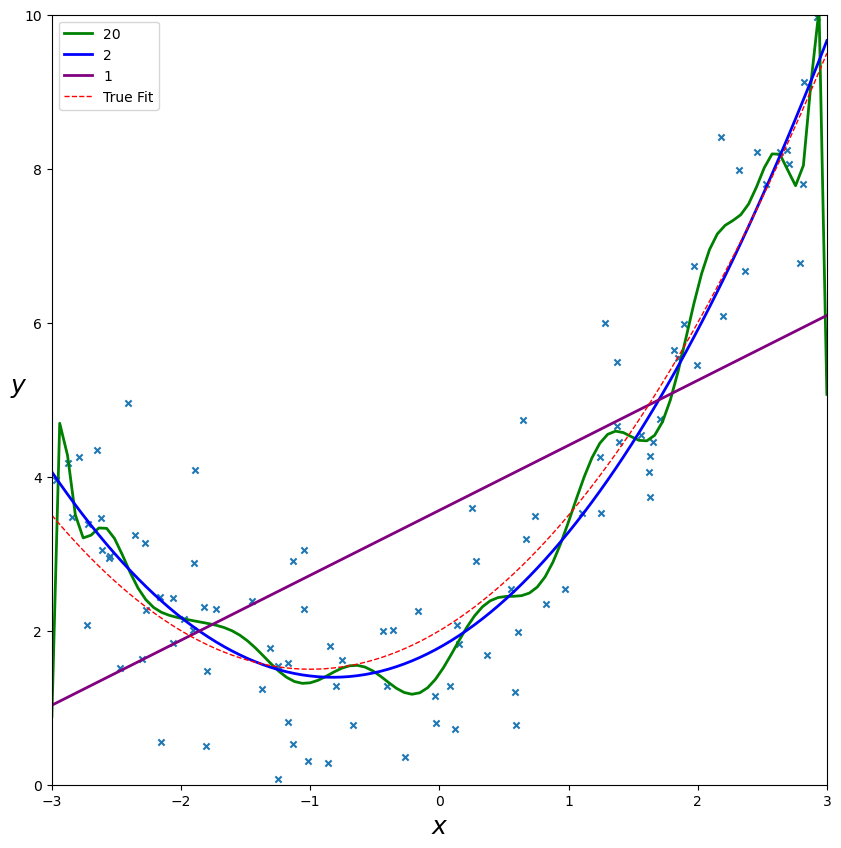

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10,10))
model_arr= []

for style, width, degree in (("g-", 2, 20), ("b", 2, 2), ("purple", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    # Below we create a complete model. We first create polynomial features, then scale the data
    # before applying the linear regression fit.
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    model_arr.append(polynomial_regression)
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_linspace)
    plt.plot(X_linspace, y_newbig, style, label=str(degree), linewidth=width)

y_true = 0.5 * (X_linspace)**2 + X_linspace +2


plt.plot(X_linspace, y_true, '--', color = 'red', linewidth = 1, label = 'True Fit')

plt.scatter(X, y, s= 20, marker ='x')
plt.legend(loc = "upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

<hr style="border:2px solid gray">

# Bias-Variance Tradeoff [^](#index) <a name="bias-var"></a>

Bias and variance are key concepts to understand in ML, as well as the trade-offs you might have to make between them. Choosing which of the two to prioritise will be dependent on the aims of your model. It may help you to think of bias and variance as being similar to **accuracy** and **precision**, 

### Bias

Bias is the inability of a machine learning model to capture the true relationship between features. Models with high bias pay less attention to the training data and oversimplify the model.

In the example above, we tried to use a simple linear ML model to predict features our 'true' quadratic feature realtionship. It does not matter how much we increased the training dataset size for this model, we would still be unable to capture the undelying complexity.

We also attempted to fit our training data with a quadratic polynomial, and a degree 20 polynomial. The quadratic model has captured the complexity of the feature relationship (as expected). The degree 20 polynomial, although squiggly, has also captured the underlying shape of the shape. We can therefore say both these models have little bias.

Similar to increasing bias, increasing accuracy (such as by taking more data points) will make our results less susceptible to noise in the model. However, if our precision is limited we may be unable to pick up finer (i.e. higher degree) trends.

### Variance

Variance is the difference in the model's fit between the training data and the test data. Models with high variance pay more attention to the training data and thus do not generalise well to test data.

The degree 20 polynomial fits the training data very well, even better than our quadratic model, as it is an overfit. However, when we compare the model to the test data (which here we can take to be the 'true' fit), we can see the model's performance in much worse. This difference in performance between the two datasets means that this model has a high varaiance.

(We can see these statements justified further in the Learning Curves section below.)

In contrast, our quadratic model performs just slightly better on our training dataset than our test dataset -  we can say that the model has low variance.

A measurement with greater precision may allow us to make predictions to a finer degree (much like how a high variance model will follow the data points more closely), but that does not mean our point measurements (or models) are accurate.

### A Note on Model Complexity

Although we can say that high variance models are 'complex', it would be **incorrect** to say that 'simpler' models will have a lower variance.

Consider $a\sin(bx)$ - it only has two parameters, but can interpolate any number of points by simply increasing b (the frequency). Thus a 'simple' model of this form is likely to have high bias **and** variance.

### Tradeoff

In this example, our feature relationship was quite simple and the exact relationship was known. This is unlikely to be the case for real data, and thus you may have to balance simplistic, low variance models and complex, high bias models. In most cases, we simply aim to minimise the overall error and find the 'sweet spot' between bias and variance. Any noise in our dataset will introduce an **irreducible error**, meaning that this minimum error can never be 0.

The figure below (from Cornell's Computer Science Course) shows this trade-off, as well as the sweet spot.

<img src="data_2_DC/imgs_basic/bias-var-tradeoff.png" alt="Comparison of PCA vs Linear Regression" width="600"/>

_References: Wikipedia's Machine Learning Series: [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)_


<div style="background-color:#FFCCCB">

## Bias-Variance Decomposition
    
We can represent the data within our dataset using the following equation, where $\boldsymbol{x_i}$ is a data instance within our data matrix X, any $y_i$ is the output for that instance:
    
\begin{equation}
y_i = f(\boldsymbol{x_i}) + \epsilon_i
\end{equation}
    
$f$ is the underlying relationship that we want our model to find, and $\epsilon_i$ is the 'noise' for that particular instance. These noise terms have an underlying Gaussian distribution with an expectaion (or mean) of 0 and a variance of $\sigma^2$. Using E() to represent the expectation of an expression and Var() to represent variance, we can write this as:
    
\begin{equation}   
    E(\epsilon) = 0 \\ Var(\epsilon) = E(\epsilon^2) = \sigma^2
\end{equation}
    
### Bias Error
    
In the cases we have seen so far, the bias error at a single point/instance, $\boldsymbol{x_i}$, is the difference between the predicted model value, $\hat{f}(\boldsymbol{x_i})$ ,and the 'ideal' (no noise) value, $f(\boldsymbol{x_i})$. In reality, it is likely we will train multiple models on different datasets. We therefore calculate the bias using the expected value from all those models. (N.b. if we only used one training iteration, $E(\hat{f}) = \hat{f}$).
    
\begin{equation}   
    Bias(\boldsymbol{x_i}) = E[\hat{f}(\boldsymbol{x_i})] -f(\boldsymbol{x_i})
\end{equation}
    
The bias referenced when discussing the perfomance of an ML model is the sum of the biases over all data points.
    
### Variance Error
    
For a single point, this is simply the variance of the predictions given by the trained models.
    
\begin{equation}    
    Var(\boldsymbol{x_i}) = E[ (\hat{f}(\boldsymbol{x_i}))^2] - (E[\hat{f}(\boldsymbol{x_i}])^2
\end{equation}    
  
Again, to find the total variance we simply sum the individual variances.
    
### Minimising Error
    
We can write the MSE at a point $\boldsymbol{x_i}$ as $E[ (\hat{f}(\boldsymbol{x_i}) - y_i)^2]$. We can simplify this using our previous expressions to obtain:
    
\begin{equation}
    MSE(\boldsymbol{x_i}) = E[ (\hat{f}(\boldsymbol{x_i}) - f(\boldsymbol{x_i}) - \epsilon_i)^2] \\    
    = E[ (\hat{f}(\boldsymbol{x_i}))^2] + E[ (f(\boldsymbol{x_i}))^2] + E[ \epsilon^2] - 2( E[\epsilon_i]E[\hat{f}(\boldsymbol{x_i})] + E[\epsilon_i]E[f(\boldsymbol{x_i})] + E[\hat{f}(\boldsymbol{x_i})]E[f(\boldsymbol{x_i})]
\end{equation}
<br> 
This seems to be quite complex inititially, however we know the expectation value of $\epsilon$ is 0, and the expectation of $f(x_i)$ is just $f(x_i)$
 
\begin{equation}
    MSE(\boldsymbol{x_i}) = E[ (\hat{f}(\boldsymbol{x_i}))^2] + f(\boldsymbol{x_i})^2 + \sigma^2 - 2f(\boldsymbol{x_i}) E[\hat{f}(\boldsymbol{x_i})] \\
    = (E[\hat{f}(\boldsymbol{x_i})] -f(\boldsymbol{x_i}))^2 + (E[ (\hat{f}(\boldsymbol{x_i}))^2] - (E[\hat{f}(\boldsymbol{x_i})])^2) + \sigma^2
\end{equation}
    
### Irreducible Error
    
The irreducible error = $\sigma^2$. No matter how perfect we make our model, we will never be able to remove this error since it is a measure of **noise** in our dataset.
    
### Key Result
    
We can now express MSE at a given point in terms of its error quantities at a point:
    
\begin{equation}
    \text{MSE} = {\text{bias}}^2 + \text{variance} + \text{Irreducible Error}
\end{equation} 
    
    
    
_References: [Medium: The Bias-Variance Trade off by Mansi Goel](https://medium.com/snu-ai/the-bias-variance-trade-off-a-mathematical-view-14ff9dfe5a3c), [Medium: Understanding the Bias-Variance Tradeoff by Seema Singh](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229), [Machine Learning 101: Bias and Variance](https://machinelearning101.readthedocs.io/en/latest/_pages/03_bias_variance.html)_

<hr style="border:2px solid gray">

# Investigating Over- and Underfitting [^](#index) <a name="over_under"></a>

### Learning Curves

From inspection, we can see that the linear fit seems to underfitted the data, whereas the 20-degree polynomial appears to have overfit. 

Previously, we saw that a model's estimated performance from cross-validation can be used to categorise a model as being overfit (performs well on training dataset but performs poorly when using CV) or underfit (performs poorly on both). 

Another way to determine whether a model is over- or underfit is to inspect the **learning curves**. Learning curves plot the model's performance on both the training set and the validation set as a function of the training set size. 

To generate these plots, we train the model several times on different sized subsets of the training set. An example cell for this is given below.


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, ax):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)   
    train_errors, val_errors = [], []
    
    for m in range(1, len(X)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    ax.set(ylim=(0,3))
    
    ax.plot(np.sqrt(train_errors), "r-", linewidth=2, label = "train")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "val")
    
    ax.grid()
    ax.legend(loc="upper right", fontsize=14)   # not shown
    ax.set_xlabel("Training set size", fontsize=14) # not shown
    ax.set_ylabel("RMSE", fontsize=14)              # not shown

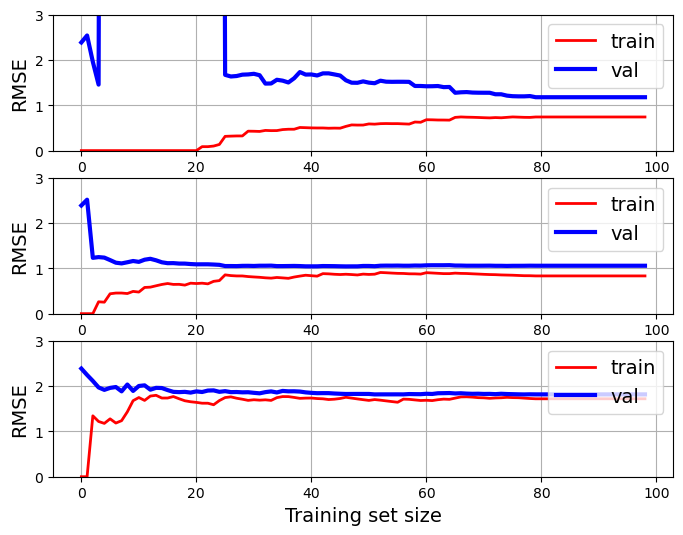

In [16]:
plt.figure(figsize=(8, 6))

for count, model in enumerate(model_arr):
    
    ax = plt.subplot(3, 1, count+1)   
    plot_learning_curves(model, X, y, ax)
    
plt.show()

The first learning curve is for a polynomial of order 20 - an overfit.
- We can largely ignore the data from before the training set size = 20, the model simply does not have enough data to try and map the underlying relatioships
- There is a significant gap between the training and validation RMSE (more so than with the other learning curves), where the training RMSE is identifiably lower than for the validation data. More complex models will have even greater gaps. This is a hallmark of overfit data, however the effect will reduce as the number of training instances increases.

The second learning curve is for a polynomial of order 2 - this matches the complexity of our underlying relationship.
- The RMSE of both the training and validation data both settle close to 1.


The third learning curve is for a polynomial of order 1 - an underfit.
- The RMSE of both the training and validation data settle close to 2, which is greater than the RMSE for the order 2 data. This suggests our model has not fully captured the complexity of the dataset (hence both errors are high).
- The RMSE have plateued at 2. If a model is underfit, adding more data will not reduce the error.

### Regularisation

In **regularised regression**, we apply a **cost function** that helps to constrain overfitting. Knowledge of this regularisation is not required, however it may be useful to know that this technique is available to you. Implementation with sklearn is quite simple, and details can be found [here](https://scikit-learn.org/stable/modules/linear_model.html).

* Ridge Regularisation,

* LASSO Regularisation,

* Elastic Net (somewhere between the two).


<div style="background-color:#FFCCCB">
 
### Principle of Regularisation
    
The fewer degrees of freedom a model has, the harder it will be for the model to overfit the data. For example, a simple way to regularise a polynomial model is to reduce the number of polynomial degrees. Note that the explanations here will discuss how regularisation works for regression models, however the technique can also be made applicable for classification.

### Types of Regularisation

**Ridge (L2) Regression** 
    
This is a regularised version of linear regression. It aims to prevent overfitting by adding a penalty term to the loss function. This should create a small increase in bias in return for a significant decrease in variance.
    
Let $\theta_{i}$ is the $i^{th}$ coefficient of the linear regression model (i.e. $y = \theta_{1}x_1 + ... \theta_{n}x_n$ + c, so $\theta$ represents the slopes). For this regularisation, we will create a hyperparameter $\lambda>0$, the greater $\lambda$, the greater the regularisation but also the greater the chance of an underfit. Finding the 'best' lambda requires us to use cross-validation to find the value that gives the lowest variance.
    
We define the so-called 'penalty term' to be:
\begin{equation}   
  \lambda|\boldsymbol{\theta}|^2=\lambda\sum_{i=1}^{n}\theta_{i}^{2}
\end{equation}

This means that our new loss function can be written as Loss = MSE + $\lambda|\boldsymbol{\theta}|^2$. The benefit of this is that the model (which trains to minimise loss) will aim to keep the model coefficients small while balancing the MSE. A smaller model coefficient will make the model less sensitive to that model feature. (N.b. when calculating the performance of your model on test data, we return to using MSE (or another error method) as normal).
   
See [StatQuest](https://www.youtube.com/watch?v=Q81RR3yKn30) for more information, an explanation on how to adapt the method for classification and how ridge regression can create a model even when there are only a  limited number of instances.
    
**LASSO (L1) Regression**    

LASSO stands for **L**ast **A**bsolute **S**hrinkage and **S**election **O**perator. It works in a similar way to Ridge Regression - a penalty term is added to the loss function to prevent overfitting. This makes the overall loss function:

\begin{equation}   
  Loss = MSE + \lambda\sum_{i=1}^{n}|\theta_{i}|
\end{equation}    
    
Again, we would find the optimised $\lambda>0$ using cross-validation.
    
The **major difference** between Ridge and Lasso regression is that in Lasso Regression the coefficients can reach **exactly 0**, whereas in Ridge Regression these coefficients **asymptote** towards 0. Being able to achieve a coefficient of exactly 0 can be useful, as it allows us to identify (and remove) features with no effect on the output. 
    
Thus for a dataset with many extraneous features, Lasso Regression will be able to lower the model variance more than Ridge. If a model has many useful features, it is generally better to use Ridge Regression.
    
If you would like to see these differences visualised, please watch [StatQuest - Ridge vs Lasso Regression](https://www.youtube.com/watch?v=Xm2C_gTAl8c).

**Elastic-Net Regularisation** 
    
Elastic Net Regularisation (ENR) is useful when not that much information is known about feature importance (i.e. if we have a large number of features), and thus the choice between Lasso and Ridge Regression is unclear. Instead we can choose to use ENR, which aims to offer a 'best of both worlds' approach. ENR uses both of the penalty terms from Lasso and Ridge Regression, with each penalty paramatised by a different $\lambda$ (again, we use cross-validation to identify the optimal choice).
    
\begin{equation}
    Loss = MSE + \lambda_1\sum_{i=1}^{n}|\theta_{i}| + \lambda_2\sum_{i=1}^{n}\theta_{i}^{2}   
\end{equation}
    
 


<div style="background-color: #C2F5DD">

### Exercise

Investigate the following student data, which you have seen previously in the Data section of this course. Experiment with using different forms of regression. First see how G3 varies with G1 and G2, and then try including a new feature that combines G1 and G2.

In [17]:
import pandas as pd
students=pd.read_excel(r'data_2_DC/student-por.xlsx') 
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# Appendix <a id='appendix'></a>

[Return to Index](#index)

In this section, you will find longer pieces of mathematics and code which are **non-examinable**, as well as some mathematical formulas you may have forgtten. Please read at your own discretion

- A. [Mathematical Equation Recap](#maths_recap)
- B. [Gradient Descent](#gradient)
- C. [Types of Gradient Descent](#types_grad)


<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## A. Mathematical Equation Recap [^^](#appendix) <a id='maths_recap'></a>

### Mean Square Error (MSE)
    
\begin{equation}
\text{MSE}=\frac{1}{N}\sum_{i=1}^{N}((y_i)'-y_i)^{2}
\end{equation}
    
where $(y_i)'$ is the label value predicted by the trained model for the $i^{th}$ instance, $y_i$ is the actual label of said test instance, $N$ is the total number of test instances and E() represent the expectation.
    
    
### Root Mean Square Error (RMSE)

This is defined mathematically as the square root of MSE
\begin{equation}
\text{RMSE}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}((y_i)'-y_i)^{2}} = E((y_i)'-y_i)^{2})
\end{equation}
    
where $(y_i)'$ is the label value predicted by the trained model for the $i^{th}$ instance, $y_i$ is the actual label of said test instance and $N$ is the total number of test instances. 
    
**Minimising RMSE will have the same effect as minimising MSE and vice versa**
    
### Euclidian Distance
    
The Euclidian distance (r) between two points, $\boldsymbol{x}$ and $\boldsymbol{y}$, in $k$ dimensional space is given by (where $x_i$ is the $i^{th}$ vector component):

\begin{equation}
r =\sqrt{\sum_{i=1}^{k}(x_i-y_i)^{2}}
\end{equation}   

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# B. Gradient Descent [^^](#appendix) <a name="gradient"></a>
    
_You have previously covered gradient descent in the Statistics part of this course. This section serves as a refresher, and may offer new insight._
    
_References: Medium: Robert Kwiatkowski - [Gradient Descent Algorithm](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21), Medium: Adarsh Menon - [Linear Regression Using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)_
    
In gradient descent, we aim to change the values of our parameters (stored in the vector $\boldsymbol{\theta}$) to find the minimum of the loss function.  
    
First, we will imagine an example where we only have one parameter, $\theta$, to optimise. We start by picking a random value for $\theta$, and calculate the loss function. We could then change $\theta$ by a small amount (i.e. + $\delta$), which we will describe as 'moving'. If the loss function has increased, this suggests we have moved in the 'wrong direction' and that our new parameter value $\theta + \delta$ produces a worse model than before. Instead, we should attempt to move in the $-\delta$ direction.
    
We want to constantly be moving in the direction where the loss function decreases. With the loss function as our y-axis, this would be in the **negative** gradient direction (down the hill). We should repeat this process until we reach the minimum (i.e. the gradient is 0).
    
This generalises easily to more dimensions. To find the minimum of loss function as quickly as possible, we assume we always want to be moving in the direction with the **greatest** negative gradient: $-\nabla L(\boldsymbol{\theta}$).
    
Note that in more sophisticated ML algorithms, this description of gradient descent is no longer accurate and just represents a simplification of the process. In reality, the optimal direction to change $\boldsymbol{\theta}$ is given by a much more involved equation than simply calculating the gradient (see [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) for Wolfe's equation).
    
    
    
    

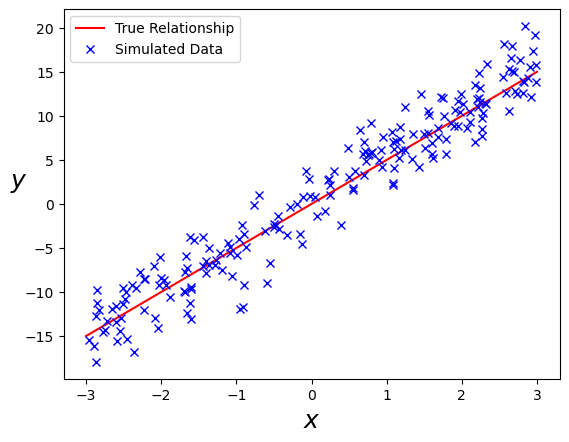

In [220]:
import numpy as np
m = 200
x_lin =np.linspace(-3,3, 100)
y_real= 5 * x_lin 

x = 6 * (np.random.rand(m, 1) - 0.5)
noise = 2.5 * (np.random.randn(m, 1)) # Adding some noise
y =  5 * x + noise 


plt.plot(x_lin, y_real, 'r', label = 'True Relationship')
plt.plot(x, y, "bx", label = 'Simulated Data')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()

plt.show()

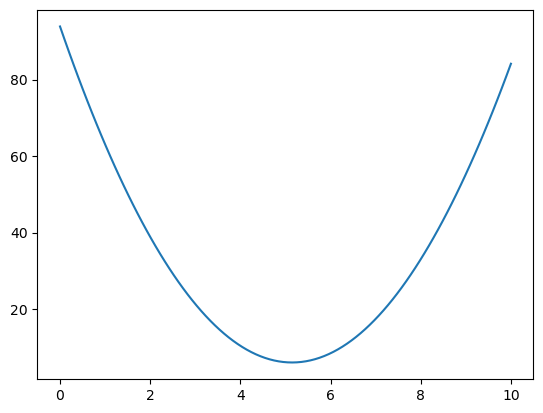

In [221]:
length = len(x)

def calc_loss(y_data, pred, length):
    
    terms = (y_data - pred)**2
    loss= np.sum(terms)/length
    return (loss)
    
def calc_grad(x_data, y_data, pred, length):
    
    terms = x_data*(y_data - pred)
    grad = -(2/length) * np.sum(terms)
    return(grad)

loss_arr=[]
theta_arr = np.linspace(0, 10, 100)

for theta in theta_arr:
    
    y_pred = theta * x
    loss = calc_loss(y, y_pred, length)
    loss_arr.append(loss)
    
plt.plot(theta_arr, loss_arr) 
plt.show()

In [227]:
def gradient_descent(theta_init, x_data, y_data, alpha, tol, max_iter):
    
    length = len (x_data)
    theta = 5 + 10 * (np.random.rand() - 0.5)
    iter_count = 0
    
    theta_arr = []
    loss_arr = []
    
    while iter_count < max_iter: 
        
        pred = theta * x_data
        
        grad = calc_grad(x_data, y_data, pred, length)
        diff = - grad * alpha
        loss = calc_loss(y_data, pred, length)
        
        if iter_count != 0:
            size = loss - loss_arr[-1]
            param = abs(size/10)
        
            plt.arrow(theta, loss_arr[-1], 0, size, head_width=param/12, linewidth=1, 
              length_includes_head=True, head_length=param/4, fc='r', ec='r')
        
        theta_arr.append(theta)
        loss_arr.append(loss)
      
        if np.abs(diff)<tol:
              break

        plt.arrow(theta, loss, diff, 0, head_width=abs(diff/3), linewidth=1, 
            length_includes_head=True, head_length=abs(diff/8), fc='r', ec='r')
        
        
        theta = theta + diff           
        
        iter_count += 1 
             
    return (theta_arr, loss_arr)

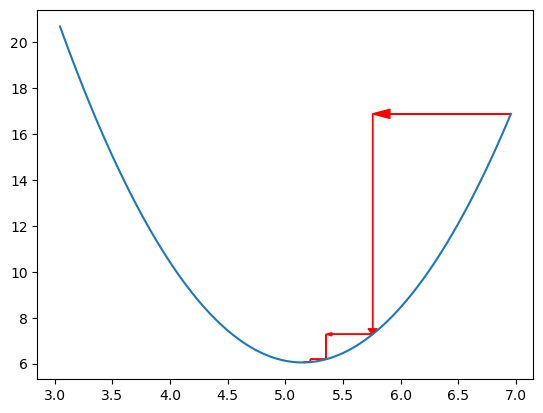

In [228]:
theta_init = 5 + 10 * (np.random.rand() - 0.5)

theta_GD, loss_GD = gradient_descent(theta_init, x, y, alpha=0.1, tol= 0.01, max_iter=20)


max_x = np.max(abs(np.array(theta_GD)-5))

loss_arr=[]
theta_arr = np.linspace(-max_x+5, max_x+5, 100)

for theta in theta_arr:
    
    y_pred = theta * x
    loss = calc_loss(y, y_pred, length)
    loss_arr.append(loss)
    
plt.plot(theta_arr, loss_arr) 

plt.show()

<div style="background-color:#efdff2">

Choosing a good learning rate is important to improve training performance. If the rate is too small, training will take a long time. If it is too large, the algorithm may miss the minimum entirely, bouncing between the two sides of the loss function.

<div style="background-color:#efdff2">

The MSE loss function for modelling a linear relationship is concex, which is why an appropriate learning rate will always find the ideal m (or c). However, we can imagine a situation where the plot of loss function against parameter also has a **local** minimum. The gradient descent algorithm could easily become stuck in that minimum, and thus the function would not be optimised. To solve this, we could either choose our input values for carefully, or perform many runs with many inputs to see what value produced the lowest loss function. We could also use 'momentum' to update our parameteres, which reduces the risk of falling into a local minimum.

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# C. Types of Gradient Descent [^^](#appendix) <a name="types_grad"></a>

